### This notebook presents how to obtain number embeddings with NEKG.

<ul>
    <li> In <b>Section 3.1</b>, we construct the knowledge, generating 200 triples (e.g., ['0','isLessThan', '50'], ['100','isLessThan', '150'], etc.).</li><br>
    <li>In <b>Section 3.2</b>, we embed the graph in a 100-D vector space using a standard graph embedding method TransE. We visualize the embedding vectors using t-SNE in a 2-D space.</li><br>
    <li>In <b>Section 3.3</b>, we embed the integers from 500 to 1000 (i.e., [500, 1000)) using the interpolation method and visualize the embedding vectors using t-SNE in a 2-D space.</li>
</ul>




In [53]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import ampligraph
import ampligraph.latent_features as AL

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

<b>VERSION:</b>
<ul>
    <li>python 3.7.3</li>
    <li>tensorflow 1.15.0</li>
    <li>numpy 1.19.5</li>
    <li>ampligraph 1.3.2</li>
    <li>pandas 0.24.1</li>
    <li>sklearn 0.21.2</li>
    <li>matplotlib 3.4.2</li>
</ul>

### 3.1 Knowledge Graph Construction

In [54]:
# Knowledge Graph Construction.
def graph_construction(start, stop, step):
    kg = pd.DataFrame()
    kg['h'] = [i for i in np.arange(start, stop, step)]
    kg['r'] = ['isLessThan'] * int((stop-start) / step)
    kg['t'] = [i for i in np.arange(step, stop+1, step)]
    kg["h"] = kg.h.values.astype(str)
    kg["t"] = kg.t.values.astype(str)
    return kg

In [55]:
start = 0
stop = 10000
step = 50
kg_df = graph_construction(start, stop, step)
kg_df.head()

,h,r,t
0,0,isLessThan,50
1,50,isLessThan,100
2,100,isLessThan,150
3,150,isLessThan,200
4,200,isLessThan,250


### 3.2 Knowledge Graph Embedding

In [56]:
# Embedding Model.
kg_array = kg_df.to_numpy().astype(str)
model = AL.ComplEx(epochs=100, k=100, verbose=True)# the k = 100 is the dimension of the embedding space.
model.fit(kg_array)

2022-11-07 21:34:22.420784: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:969] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-07 21:34:22.420835: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce GTX 1660 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:01:00.0
2022-11-07 21:34:22.420964: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64
2022-11-07 21:34:22.421058: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcublas.so.10.0'; dlerror: libcublas.so.10.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64
2022

In [57]:
# Obtain the embedding vector of 100.
embedding = model.get_embeddings(entities='100', embedding_type='entity')
embedding

array([ 0.2177633 ,  0.4746829 ,  0.98325205,  0.25391558,  0.2210952 ,
       -0.4372169 , -0.7701125 , -0.7963239 ,  0.33563453,  0.1631554 ,
        0.01381713, -0.12041377, -1.0140085 ,  0.47019795, -0.1448866 ,
        0.01034949,  0.63396543,  0.3399865 ,  0.680021  , -1.0436022 ,
        1.1602477 ,  0.02356263, -0.28724712, -0.13611525, -0.65639853,
       -0.07585389,  0.30119416, -0.23065148,  0.2021711 ,  0.85362566,
       -0.11550032, -0.84279424,  0.9922444 , -0.7266591 , -0.07853699,
        1.7822113 ,  0.40648824,  0.09726575,  0.03645173, -0.63545936,
       -0.23505567, -0.25832883, -0.48261747,  0.07976238, -0.2686985 ,
       -0.52202433,  0.84356004,  0.4936077 ,  0.34255305,  0.29186738,
        0.53158325, -0.59940016,  0.5355654 , -1.1391621 ,  0.10177246,
       -0.18435341,  0.9080357 , -1.172677  , -0.9028284 ,  0.24051298,
       -1.0851341 , -0.5496257 , -0.7864551 ,  1.2732087 , -0.10558029,
        0.4220905 , -0.72613204, -0.39370126,  0.9897749 , -0.69

In [58]:
# Dimensionality reduction using t-SNE.
embeddings = model.get_embeddings(entities=[str(j) for j in np.arange(start, stop+1, step)], embedding_type='entity')
embeddings = np.asarray(embeddings, dtype='float64')
embeddings_tSNE = TSNE(n_components=2).fit_transform(embeddings)
embeddings_tSNE = pd.DataFrame(embeddings_tSNE, columns=['tSNE_1', 'tSNE_2'])
embeddings_tSNE['magnitude'] = [i for i in range(start, stop+1, step)]
embeddings_tSNE.head()

/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


,tSNE_1,tSNE_2,magnitude
0,47.312286,67.863365,0
1,7.306326,63.135895,50
2,111.628006,19.362228,100
3,-179.284683,-21.205246,150
4,3.543746,80.116241,200


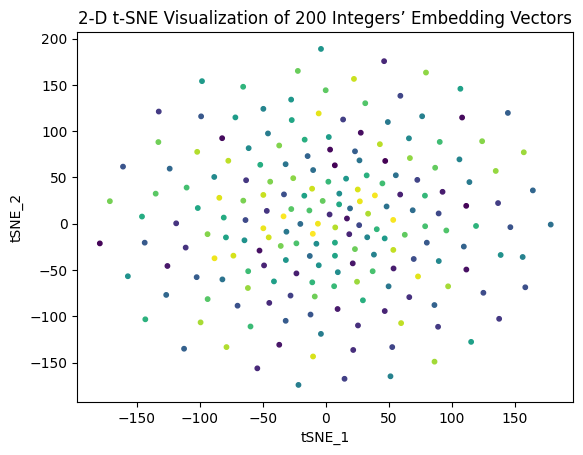

In [59]:
# Visualize the embedding vectors in 2-D space.
plt.scatter(embeddings_tSNE.tSNE_1, embeddings_tSNE.tSNE_2, c=embeddings_tSNE.magnitude, s=10)
plt.title('2-D t-SNE Visualization of 200 Integers’ Embedding Vectors')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.show()

### 3.3 Interpolation Method

In [60]:
# Measure the similarity between numbers.
def cal_sim(x1, x2, x3):
    return (x2-x1)/(x3-x1)

In [61]:
# Obtain embedding vectors for OOVs.
OOVs = range(500, 1000)
OOV_embeddings = []
for i in OOVs:
    for j in np.arange(start, stop+1, step):
        if i < j:
            upper = j
            lower = j-step
            e1 = model.get_embeddings(str(lower), embedding_type='entity')
            e2 = model.get_embeddings(str(upper), embedding_type='entity')
            s2 = cal_sim(lower, i, upper)
            s1 = 1-s2            
            OOV_embeddings.append(e1 * s1 + e2 * s2)
            break

In [62]:
# Dimensionality reduction using t-SNE.
OOV_embeddings = np.asarray(OOV_embeddings, dtype='float64')
OOV_embeddings_tSNE = TSNE(n_components=2).fit_transform(OOV_embeddings)
OOV_embeddings_tSNE = pd.DataFrame(OOV_embeddings_tSNE, columns=['tSNE_1', 'tSNE_2'])
OOV_embeddings_tSNE['magnitude'] = OOVs
OOV_embeddings_tSNE.head()

/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


,tSNE_1,tSNE_2,magnitude
0,-26.305965,-0.454704,500
1,-26.330006,-0.356615,501
2,-26.047155,-0.405911,502
3,-25.928902,-0.348504,503
4,-26.353483,0.021725,504


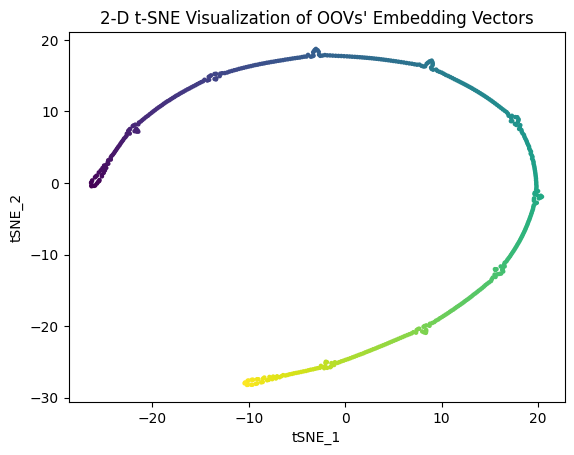

In [63]:
# Visualize the embedding vectors of OOVs in 2-D space.
plt.scatter(OOV_embeddings_tSNE.tSNE_1, OOV_embeddings_tSNE.tSNE_2, c=OOV_embeddings_tSNE.magnitude, s=5)
plt.title('2-D t-SNE Visualization of OOVs\' Embedding Vectors')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.show()